In [6]:
import os
import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
gps= pd.read_csv("C:/Users/visha/Desktop/Assignment ML/googleplaystore.csv")


In [8]:
gps.shape

(10841, 13)

In [9]:
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
gps['Rating'].fillna((gps['Rating'].mean()), inplace=True)

In [11]:
#DATA CLEANING

In [12]:
#total number of unique apps in dataset
no_of_apps = gps["App"].nunique()
print(f"Number of unique apps: {no_of_apps}")

Number of unique apps: 9660


In [13]:
#remove all duplicate rows corresponding to app column
gps.drop_duplicates(subset=['App'], keep=False)
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
#delete unnecesaary rows creating issues in modelling
gps = gps.drop([10472])

In [15]:
#conversion of size column to a convinient format
gps["Size"] = gps["Size"].apply(lambda x: str(x).replace(",", "") if "," in str(x) else x)
gps["Size"] = gps["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
gps["Size"] = gps["Size"].apply(lambda x: str(x).replace("Varies with device", "NAN") if "Varies with device" in str(x) else x)
gps["Size"] = gps["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
gps["Size"] = gps["Size"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)

In [16]:
#convert size to float and replace 'NAN' in size column with mean of the column
gps["Size"] = gps["Size"].apply(lambda x:float(x))
gps["Size"].fillna((gps["Size"].mean()), inplace=True)

In [17]:
#Install column with '+', ',' signs are removed to help easy computation
gps["Installs"] = gps["Installs"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)
gps["Installs"] = gps["Installs"].apply(lambda x: x.replace(",","") if "," in str(x) else x)
gps["Installs"] = gps["Installs"].apply(lambda x:float(x))

In [18]:
#Converting Type column to 1 (for paid) and 0 (for free) apps
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1
gps['Type'] = gps['Type'].map(type_cat)
    
gps["Reviews"] = gps["Reviews"].astype("int64")

In [19]:
#Make the price column consistent by removing the '$' symbol and replacing "Free" with 0
gps["Price"] = gps["Price"].apply(lambda x: x.replace("Free",0) if "Free" in str(x) else x)
gps["Price"] = gps["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)
gps["Price"] = gps["Price"].apply(lambda x: float(x))
gps["Price"].dtype

dtype('float64')

In [20]:
gps['Category_C'] = gps['Category']

In [21]:
#PREPROCESSING DATASET

In [22]:

gps_copy = gps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns and converting the type
gps_copy['Category'] = label_encoder.fit_transform(gps_copy['Category']) 
gps_copy['Content Rating'] = label_encoder.fit_transform(gps_copy['Content Rating']) 
gps_copy['Genres'] = label_encoder.fit_transform(gps_copy['Genres']) 
gps_copy.dtypes

App                object
Category            int32
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type                int64
Price             float64
Content Rating      int32
Genres              int32
Last Updated       object
Current Ver        object
Android Ver        object
Category_C         object
dtype: object

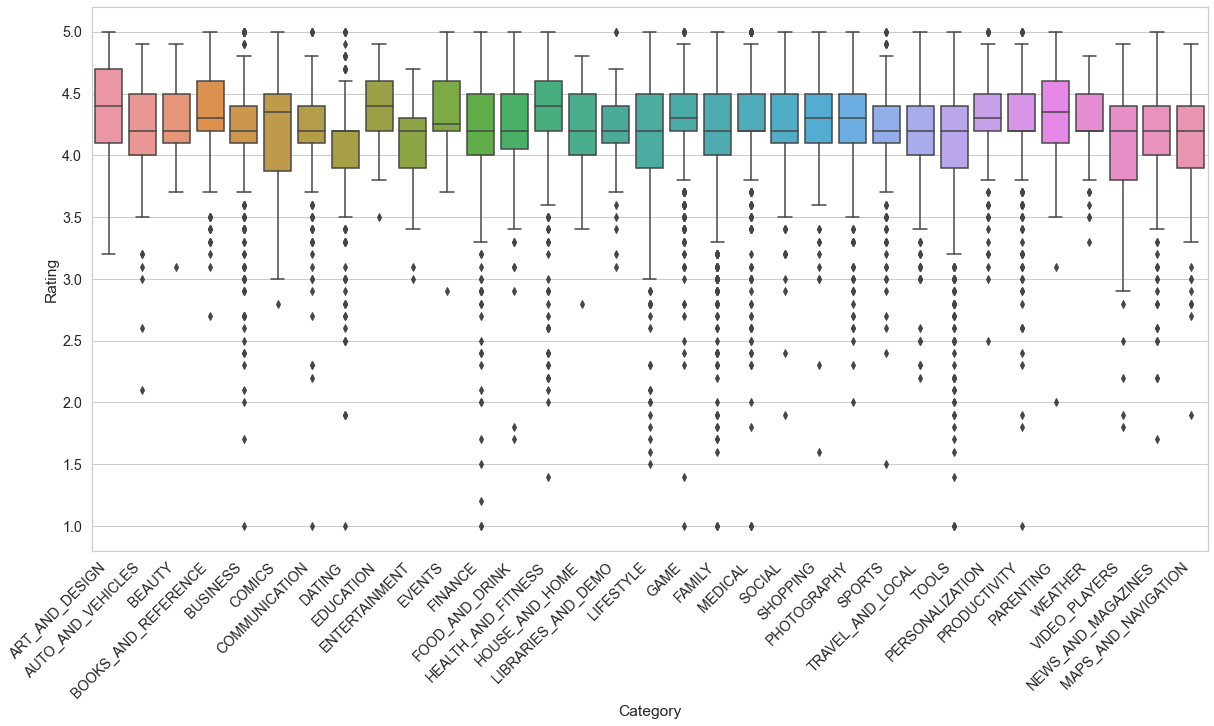

In [23]:

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.3, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=gps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [24]:

gps_copy = gps_copy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)

In [25]:
gps_copy.to_csv("result_play_store.csv", encoding='utf-8', index=False)

In [26]:
print("There are {} total rows.".format(gps_copy.shape[0]))
count_popular = gps_copy[gps_copy["Installs"] > 100000].count()

print("{} have High Install popularity !".format(count_popular[0]))
print("{} have Low Install popularity !\n".format((gps_copy.shape[0]-count_popular)[0]))



There are 10840 total rows.
4950 have High Install popularity !
5890 have Low Install popularity !



In [27]:
#print("For an 80-20 training/test split, we need about {} apps for testing\n".format(gps_copy.shape[0]*.20))

gps_copy["Installs"] = (gps_copy["Installs"] > 100000)*1 #Installs Binarized

#print("Cut {} apps off Popular ones for a total of 3558 Popular training apps.".format(int(4568*.22132)))
#print("Cut {} apps off Unpopular ones for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

In [28]:
testing_popular1 = gps_copy[gps_copy["Installs"] == 1].sample(1010,random_state=0)
gps_copy = gps_copy.drop(testing_popular1.index)
#print("Values were not dropped from training dataframe.",testing_popular1.index[0] in google_apps_copy.index)

testing_popular0 = gps_copy[gps_copy["Installs"] == 0].sample(766,random_state=0)
gps_copy = gps_copy.drop(testing_popular0.index)
#print("Values were not dropped from training dataframe.",testing_popular0.index[0] in google_apps_copy.index)

In [29]:
train_gps = gps_copy
test_gps = testing_popular1.append(testing_popular0)

#Shuffle rows in test & training data set
test_gps = test_gps.sample(frac=1, random_state=0).reset_index(drop=True)
test_gps = test_gps.sample(frac=1, random_state=0).reset_index(drop=True)

In [30]:
#Form training and test data split
y_train = train_gps.pop("Installs")
X_train = train_gps.copy()
y_test = test_gps.pop("Installs")
X_test = test_gps.copy()

In [31]:
#ML MODELLING

In [32]:
#Run with different ML model to check the accuracy
X_train = X_train.drop(['Category_C'], axis=1)
X_test = X_test.drop(['Category_C'], axis=1)

In [33]:
print("{} apps are used for Training.".format(y_train.count()))
print("{} apps are used for Testing.".format(y_test.count()))
X_test.head()

9064 apps are used for Training.
1776 apps are used for Testing.


,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres
0,4,4.193338,0,5.000000,0,0.0,1,22
1,11,4.300000,169609,34.000000,0,0.0,1,7
2,11,4.700000,198480,82.000000,0,0.0,1,97
3,9,4.200000,98509,21.516165,0,0.0,1,52
4,23,4.600000,7583,3.800000,0,0.0,2,80


In [34]:
#DECISION TREE

In [35]:
classify_DT = DecisionTreeClassifier(max_leaf_nodes = 29, random_state = 0) #max_leaf_nodes signifies no. of nodes
classify_DT.fit(X_train, y_train)
predict_popular_DT = classify_DT.predict(X_test)
print("Predicted: ",predict_popular_DT[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [36]:
#RANDOM FOREST

In [37]:
classify_RF = RandomForestRegressor(n_estimators = 100 , random_state = 0)   #n_estimators is no of trees in forest
classify_RF.fit(X_train , y_train)
predict_popular_RF = classify_RF.predict(X_test)
print("Predicted: ",predict_popular_RF[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [38]:
#LINEAR REGRESSION

In [39]:
classify_LR1 = LinearRegression()
classify_LR1.fit(X_train , y_train)
predict_popular_LR1 = classify_LR1.predict(X_test)
print("Predicted: ",predict_popular_LR1[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [40]:
#ACCURACY SCORE OF DECISION TREE

In [41]:
acc_LR1 = accuracy_score(y_true = y_test, y_pred = predict_popular_LR1.astype("int64"))
print("Accuracy of Decision Tree : ", (acc_LR1*100))

def Evaluationmatrix_LR1(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_LR1(y_test,predict_popular_LR1)

print('R square value : ',r2_score(y_test, predict_popular_LR1))

Accuracy of Decision Tree :  44.42567567567568
Mean Squared Error: 0.21189307922210537
Mean absolute Error: 0.4239598631019432
R square value :  0.13612172653560517


In [42]:
#LOGISTIC REGRESSION

In [43]:
classify_LR = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
classify_LR.fit(X_train , y_train)
predict_popular_LR = classify_LR.predict(X_test)
print("Predicted: ",predict_popular_LR[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#NAIVE BAYES

In [45]:
classify_NB = GaussianNB()
classify_NB.fit(X_train, y_train)
predict_popular_NB = classify_NB.predict(X_test)
print("Predicted: ",predict_popular_NB[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [46]:
#K NEAREST NEIGHBORS

In [47]:
classify_KNN = KNeighborsClassifier(n_neighbors=15)
classify_KNN.fit(X_train, y_train)
predict_popular_KNN = classify_KNN.predict(X_test)
print("Predicted: ",predict_popular_KNN[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [48]:
#Artificial Neural Network

In [49]:
#Artificial Neural Network

classify_ANN = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(5, 3), random_state=0)
classify_ANN.fit(X_train, y_train)
predict_popular_ANN = classify_ANN.predict(X_test)
print("Predicted: ",predict_popular_ANN[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


C:\Users\visha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [50]:
#SVM regressor

In [51]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
classify_SVR = svm.SVR()
classify_SVR.fit(X_train, y_train)
predict_popular_SVR = classify_SVR.predict(X_test)
predict_popular_SVR = classify_SVR.predict(X_test)
print("Predicted: ",predict_popular_SVR[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [52]:
#ACCURACY SCORE OF DECISION TREE

In [53]:
acc_DT = accuracy_score(y_true = y_test, y_pred = predict_popular_DT)
print("Accuracy of Decision Tree :", (acc_DT*100).astype("int64"),"%")

Accuracy of Decision Tree : 95 %


In [54]:
#ACCURACY SCORE OF RANDOM FOREST

In [55]:

acc_RF = accuracy_score(y_true = y_test, y_pred = predict_popular_RF.astype("int64"))
print("Accuracy of Random Forest : ", (acc_RF*100).astype("int64"),"%")

Accuracy of Random Forest :  88 %


In [56]:
#ACCURACY SCORE OF LOGISTIC REGRESSION

In [57]:
acc_LR = accuracy_score(y_true = y_test, y_pred = predict_popular_LR.astype("int64"))
print("Accuracy of Logistic Regression : ", (acc_LR*100).astype("int64").astype("int64"),"%")

Accuracy of Logistic Regression :  94 %


In [58]:
#ACCURACY SCORE OF LINEAR REGRESSION

In [59]:
acc_LR1 = accuracy_score(y_true = y_test, y_pred = predict_popular_LR1.astype("int64"))
print("Accuracy of Linear Regression : ", (acc_LR1*100).astype("int64").astype("int64"),"%")

Accuracy of Linear Regression :  44 %


In [60]:
#ACCURACY SCORE OF NAIVE BAYES

In [61]:
acc_NB = accuracy_score(y_true = y_test, y_pred = predict_popular_NB.astype("int64"))
print("Accuracy of Naive Bayes : ", (acc_NB*100).astype("int64"),"%")

Accuracy of Naive Bayes :  89 %


In [62]:
#ACCURACY SCORE OF K NEAREST NEIGHBOR

In [63]:
acc_KNN = accuracy_score(y_true = y_test, y_pred = predict_popular_KNN.astype("int64"))
print("Accuracy of K NEAREST NEIGHBOR : ", (acc_KNN*100).astype("int64"),"%")

Accuracy of K NEAREST NEIGHBOR :  94 %


In [64]:
#ACCURACY SCORE OF AIRTIFIAL NEURAL NETWORK

In [65]:
acc_ANN = accuracy_score(y_true = y_test, y_pred = predict_popular_ANN.astype("int64"))
print("Accuracy of K NEURAL NETWORKS : ", (acc_ANN*100).astype("int64"),"%")

Accuracy of K NEURAL NETWORKS :  94 %


In [66]:
#ACCURACY SCORE OF SVR

In [67]:
acc_SVR = accuracy_score(y_true = y_test, y_pred = predict_popular_SVR.astype("int64"))
print("Accuracy of SUPPORT VECTOR REGRESSOR : ", (acc_SVR*100).astype("int64"),"%")

Accuracy of SUPPORT VECTOR REGRESSOR :  52 %


In [68]:
X_testCopy = X_test.copy()
X_testCopy["Popular"] = y_test
X_testCopy[X_test["Size"] == 21.516165].head()
#X_testCopy.to_csv("Test.csv", encoding='utf-8', index=False)

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Popular


In [69]:
X_testCopy.sort_values(by='Popular').sample(10)

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Popular
845,11,3.1,306,2.900000,0,0.0,1,97,0
1179,28,4.5,5675,49.000000,0,0.0,1,102,0
1156,15,4.4,229210,21.516165,0,0.0,1,62,1
90,11,4.3,6669,31.000000,0,0.0,1,97,1
573,27,4.1,5285,4.000000,0,0.0,1,101,1
313,28,4.4,133825,34.000000,0,0.0,2,102,1
730,25,4.4,691474,21.516165,0,0.0,1,82,1
377,11,3.9,5933,60.000000,0,0.0,1,46,1
1113,21,3.5,66,12.000000,0,0.0,1,75,0
949,29,4.2,24,5.000000,0,0.0,1,108,0


In [70]:
#CALCULATION OF ERROR

In [71]:
#R square value of Decision Tree

Mean Squared Error: 0.04222972972972973
Mean absolute Error: 0.04222972972972973
R square value :  0.8278313471033787
[[741  25]
 [ 50 960]]


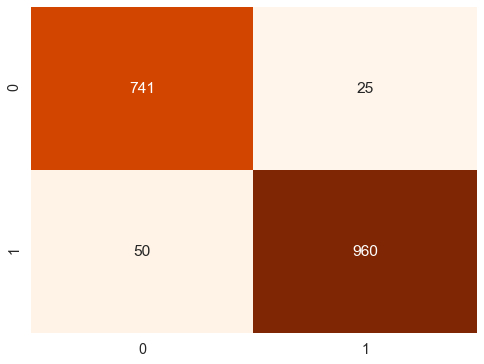

In [72]:
def Evaluationmatrix_DT(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_DT(y_test,predict_popular_DT)

print('R square value : ',r2_score(y_test, predict_popular_DT))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_DT)
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=False)


In [73]:
#R square value of Random Forest

Mean Squared Error: 0.029820664414414416
Mean absolute Error: 0.05823761261261261
R square value :  0.8784225318615412
[[766   0]
 [213 797]]


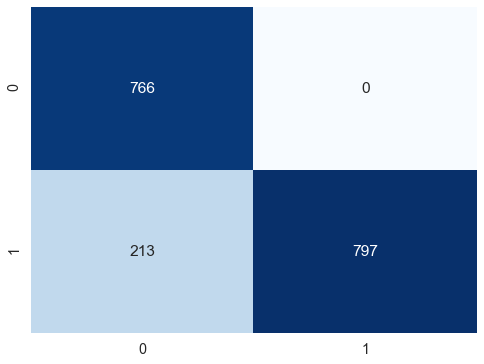

In [74]:

def Evaluationmatrix_RF(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_RF(y_test,predict_popular_RF)

print('R square value : ',r2_score(y_test, predict_popular_RF))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_RF.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [75]:
#R square value of Linear Regression

Mean Squared Error: 0.051238738738738736
Mean absolute Error: 0.051238738738738736
R square value :  0.7911020344854328
[[755  11]
 [ 80 930]]


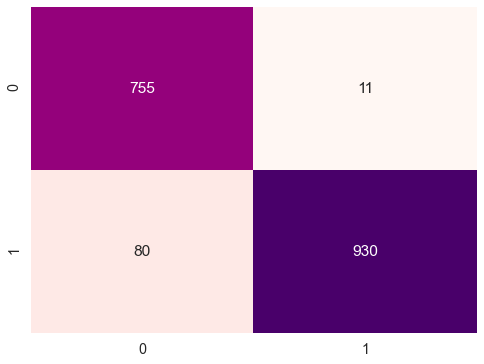

In [76]:
def Evaluationmatrix_LR(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_LR(y_test,predict_popular_LR)

print('R square value : ',r2_score(y_test, predict_popular_LR))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_LR.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="RdPu",fmt="d",cbar=False)

In [77]:
#R square value of Naive Bayes

Mean Squared Error: 0.10247747747747747
Mean absolute Error: 0.10247747747747747
R square value :  0.5822040689708656
[[755  11]
 [171 839]]


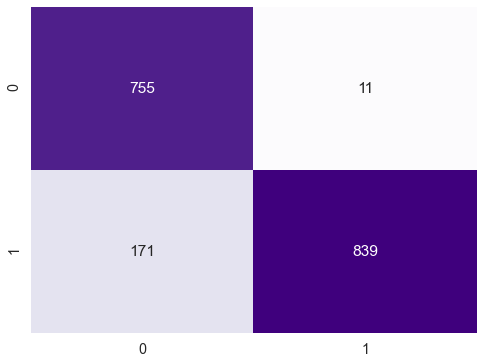

In [78]:
def Evaluationmatrix_NB(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_NB(y_test,predict_popular_NB)

print('R square value : ',r2_score(y_test, predict_popular_NB))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_NB.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Purples",fmt="d",cbar=False)

In [79]:
#R square value of K Nearest Neighbor

Mean Squared Error: 0.05686936936936937
Mean absolute Error: 0.05686936936936937
R square value :  0.7681462140992166
[[726  40]
 [ 61 949]]


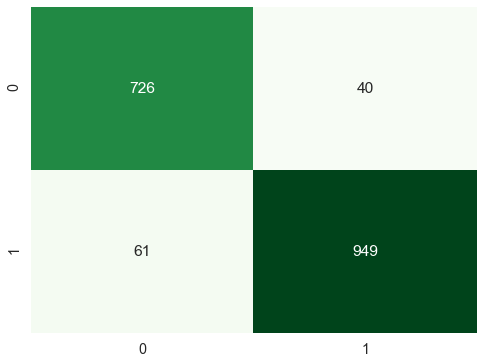

In [80]:
def Evaluationmatrix_KNN(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_KNN(y_test,predict_popular_KNN)

print('R square value : ',r2_score(y_test, predict_popular_KNN))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_KNN.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=False)

In [81]:
#R square value of AIRTIFICIAL NEURAL NETWORKS

Mean Squared Error: 0.05067567567567568
Mean absolute Error: 0.05067567567567568
R square value :  0.7933976165240544
[[740  26]
 [ 64 946]]


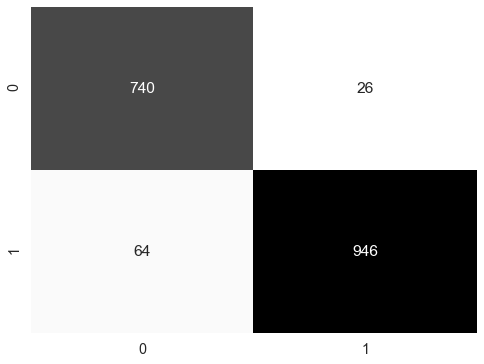

In [82]:
def Evaluationmatrix_ANN(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_ANN(y_test,predict_popular_ANN)

print('R square value : ',r2_score(y_test, predict_popular_ANN))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_ANN.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Greys",fmt="d",cbar=False)

In [83]:
#R square value of Support Vector Regressor

Mean Squared Error: 0.2357940523678755
Mean absolute Error: 0.3621385180183713
R square value :  0.03867856562120775
[[740  26]
 [ 64 946]]


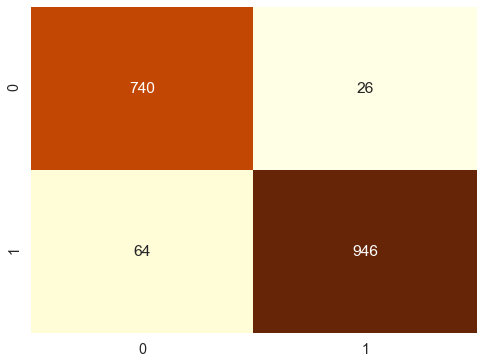

In [84]:
def Evaluationmatrix_SVR(y_test, y_pred):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,y_pred)))

Evaluationmatrix_SVR(y_test,predict_popular_SVR)

print('R square value : ',r2_score(y_test, predict_popular_SVR))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_popular_ANN.astype("int64"))
print(cm)
index = ['Predicted Success','Predicted Unsuccess']  
columns = ['Actual Success','Actual Unsuccess']  
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="YlOrBr",fmt="d",cbar=False)

In [85]:
#COMPARISMOFMODELS

Text(0.5, 1.0, 'Model Accracy')

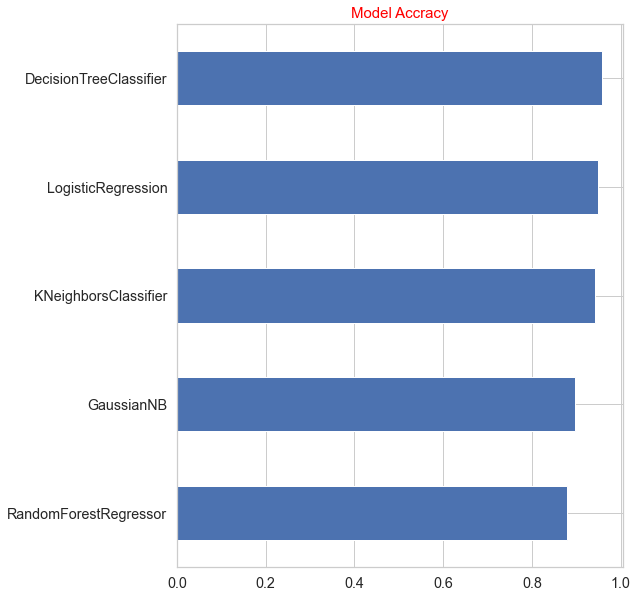

In [88]:
%matplotlib inline
model_accuracy = pd.Series(data=[acc_DT,acc_RF,acc_LR,acc_NB,acc_KNN,], 
        index=['DecisionTreeClassifier','RandomForestRegressor','LogisticRegression','GaussianNB','KNeighborsClassifier'])
fig= plt.figure(figsize=(8,10))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')
plt.title('Model Accracy',color = 'Red',fontsize = 15)

In [89]:
model_accuracy.sort_values()

RandomForestRegressor     0.880068
GaussianNB                0.897523
KNeighborsClassifier      0.943131
LogisticRegression        0.948761
DecisionTreeClassifier    0.957770
dtype: float64